## Stage 2 - Task 1

In [1]:
import pandas as pd
from datetime import datetime
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
from IPython.display import Image

#import exception handling
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing super dataset
data = pd.read_csv('superdataset.csv')

### Converting date to datetime() format

In [5]:
#convert all dates from object formats to datetime
data['Date'] = data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
#remove all empty rows, removing state unallocated.
data = data[data.countyFIPS != 0]

## Here, I am selecting North Carolina state for analysis. 

In [6]:
nc = data[data.State == 'NC']

### Grouping the data by Date and calculating sum on columns by Date

In [7]:
nc = nc.groupby(["Date"]).sum().reset_index()
nc

,Date,countyFIPS,Confirmed,Deaths,population
0,2020-01-22,3710000,0,0,10488084
1,2020-01-23,3710000,0,0,10488084
2,2020-01-24,3710000,0,0,10488084
3,2020-01-25,3710000,0,0,10488084
4,2020-01-26,3710000,0,0,10488084
...,...,...,...,...,...
743,2022-02-03,3710000,2456386,21027,10488084
744,2022-02-04,3710000,2468806,21097,10488084
745,2022-02-05,3710000,2468806,21097,10488084
746,2022-02-06,3710000,2468806,21097,10488084


### Now use diff() to find new number of cases and deaths in a day.

In [8]:
nc['confirmed_daily'] = nc['Confirmed'].diff()
nc

,Date,countyFIPS,Confirmed,Deaths,population,confirmed_daily
0,2020-01-22,3710000,0,0,10488084,NaN
1,2020-01-23,3710000,0,0,10488084,0.0
2,2020-01-24,3710000,0,0,10488084,0.0
3,2020-01-25,3710000,0,0,10488084,0.0
4,2020-01-26,3710000,0,0,10488084,0.0
...,...,...,...,...,...,...
743,2022-02-03,3710000,2456386,21027,10488084,14980.0
744,2022-02-04,3710000,2468806,21097,10488084,12420.0
745,2022-02-05,3710000,2468806,21097,10488084,0.0
746,2022-02-06,3710000,2468806,21097,10488084,0.0


In [9]:
nc['deaths_daily'] = nc['Deaths'].diff()
nc = nc.iloc[1: , :]
nc

,Date,countyFIPS,Confirmed,Deaths,population,confirmed_daily,deaths_daily
1,2020-01-23,3710000,0,0,10488084,0.0,0.0
2,2020-01-24,3710000,0,0,10488084,0.0,0.0
3,2020-01-25,3710000,0,0,10488084,0.0,0.0
4,2020-01-26,3710000,0,0,10488084,0.0,0.0
5,2020-01-27,3710000,0,0,10488084,0.0,0.0
...,...,...,...,...,...,...,...
743,2022-02-03,3710000,2456386,21027,10488084,14980.0,123.0
744,2022-02-04,3710000,2468806,21097,10488084,12420.0,70.0
745,2022-02-05,3710000,2468806,21097,10488084,0.0,0.0
746,2022-02-06,3710000,2468806,21097,10488084,0.0,0.0


#### Now perform normalization on columns by a range of 1000000

#### I am saving the normalized data on the same columns confirmed_daily and deaths_daily

In [10]:
nc['confirmed_daily'] = (nc['confirmed_daily']/nc['population'])*1000000
nc['deaths_daily'] = (nc['deaths_daily']/nc['population'])*1000000
nc['date'] =  pd.to_datetime(nc['Date'], format='%Y-%m-%d')
nc = nc[['date','confirmed_daily','deaths_daily']]

### After normalization, converting data from daily to weekly.

In [11]:
#coverting data from daily to weekly
nc = nc.groupby([pd.Grouper(key='date', freq='w')])['confirmed_daily','deaths_daily'].agg({'confirmed_daily':'sum','deaths_daily' :'sum'}).reset_index().round(decimals=0)
nc

,date,confirmed_daily,deaths_daily
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
...,...,...,...
103,2022-01-16,17767.0,27.0
104,2022-01-23,15859.0,20.0
105,2022-01-30,19718.0,46.0
106,2022-02-06,9224.0,48.0


## Task 1: 
### Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state.

In [12]:
#calculate statistics for north carolina for both cases and deaths
mean = nc["confirmed_daily"].agg(["mean"])
median = nc["confirmed_daily"].agg(["median"])
mode = nc.loc[:,"confirmed_daily"].mode()
death_mean = nc["deaths_daily"].agg(["mean"])
death_median = nc["deaths_daily"].agg(["median"])
death_mode = nc.loc[:,"deaths_daily"].mode()

### Rounding the above data to decimal value and printing the statistics

In [15]:
print('North Carolina Statistics: ', '\n', 'Weekly Confirmed Cases Mean: ', mean[0].round(decimals=0), '\n', 'Weekly Confirmed Cases Median: ', median[0].round(decimals=0), '\n', 'Weekly Confirmeed Cases Mode: ', mode[0],'\n', 'Weekly Death Mean: ', death_mean[0].round(decimals=0), '\n', 'Weekly Death Median: ', death_median[0], '\n', 'Weekly Death Mode: ', death_mode[0])


North Carolina Statistics:  
 Weekly Confirmed Cases Mean:  2201.0 
 Weekly Confirmed Cases Median:  1217.0 
 Weekly Confirmeed Cases Mode:  0.0 
 Weekly Death Mean:  19.0 
 Weekly Death Median:  14.0 
 Weekly Death Mode:  0.0


## Task 2:
### Compare data against other states

# Adding 5 states data

In [16]:
combine_states= data[data["State"].isin(["NC","OH","NJ","NH","TX","FL"])]
combine_states

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
238612,12001,alachua county,FL,2020-01-22,0,0,269043
238613,12001,alachua county,FL,2020-01-23,0,0,269043
238614,12001,alachua county,FL,2020-01-24,0,0,269043
238615,12001,alachua county,FL,2020-01-25,0,0,269043
238616,12001,alachua county,FL,2020-01-26,0,0,269043
...,...,...,...,...,...,...,...
2097387,48507,zavala county,TX,2022-02-03,3853,59,11840
2097388,48507,zavala county,TX,2022-02-04,3865,59,11840
2097389,48507,zavala county,TX,2022-02-05,3872,59,11840
2097390,48507,zavala county,TX,2022-02-06,3893,59,11840


### Calculating the  daily new cases and deaths in all the states

In [17]:
#Calculate new cases and deaths
combine_states['confirmed_daily'] = combine_states['Confirmed'].diff()
combine_states['deaths_daily'] = combine_states['Deaths'].diff()
combine_states

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,confirmed_daily,deaths_daily
238612,12001,alachua county,FL,2020-01-22,0,0,269043,NaN,NaN
238613,12001,alachua county,FL,2020-01-23,0,0,269043,0.0,0.0
238614,12001,alachua county,FL,2020-01-24,0,0,269043,0.0,0.0
238615,12001,alachua county,FL,2020-01-25,0,0,269043,0.0,0.0
238616,12001,alachua county,FL,2020-01-26,0,0,269043,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2097387,48507,zavala county,TX,2022-02-03,3853,59,11840,13.0,0.0
2097388,48507,zavala county,TX,2022-02-04,3865,59,11840,12.0,0.0
2097389,48507,zavala county,TX,2022-02-05,3872,59,11840,7.0,0.0
2097390,48507,zavala county,TX,2022-02-06,3893,59,11840,21.0,0.0


### GroupBy() states and dates so we have the data for each state together date wise.

In [19]:
combine_states_gp = combine_states.groupby(["State","Date"]).sum().reset_index()
combine_states_gp

,State,Date,countyFIPS,Confirmed,Deaths,population,confirmed_daily,deaths_daily
0,FL,2020-01-22,808550,0,0,21477737,-5603905.0,-36921.0
1,FL,2020-01-23,808550,0,0,21477737,0.0,0.0
2,FL,2020-01-24,808550,0,0,21477737,0.0,0.0
3,FL,2020-01-25,808550,0,0,21477737,0.0,0.0
4,FL,2020-01-26,808550,0,0,21477737,0.0,0.0
...,...,...,...,...,...,...,...,...
4483,TX,2022-02-03,12256516,6239354,79117,28995881,26234.0,0.0
4484,TX,2022-02-04,12256516,6260767,79411,28995881,21413.0,294.0
4485,TX,2022-02-05,12256516,6280849,79411,28995881,20082.0,0.0
4486,TX,2022-02-06,12256516,6298674,79411,28995881,17825.0,0.0


### Cleaning data.
### Dropping columns with negative values

In [20]:
combine_states_gp = combine_states_gp.drop([0])
combine_states_gp = combine_states_gp.drop([748])
combine_states_gp = combine_states_gp.drop([1496])
combine_states_gp = combine_states_gp.drop([2244])
combine_states_gp = combine_states_gp.drop([2992])
combine_states_gp = combine_states_gp.drop([3740])

In [428]:
combine_states_gp

,State,Date,countyFIPS,Confirmed,Deaths,population,confirmed_daily,deaths_daily
1,FL,2020-01-23,808550,0,0,21477737,0.0,0.0
2,FL,2020-01-24,808550,0,0,21477737,0.0,0.0
3,FL,2020-01-25,808550,0,0,21477737,0.0,0.0
4,FL,2020-01-26,808550,0,0,21477737,0.0,0.0
5,FL,2020-01-27,808550,0,0,21477737,0.0,0.0
...,...,...,...,...,...,...,...,...
4483,TX,2022-02-03,12256516,6239354,79117,28995881,26234.0,0.0
4484,TX,2022-02-04,12256516,6260767,79411,28995881,21413.0,294.0
4485,TX,2022-02-05,12256516,6280849,79411,28995881,20082.0,0.0
4486,TX,2022-02-06,12256516,6298674,79411,28995881,17825.0,0.0


### Normalizing the data by a range of 1000000

In [21]:
#Normalization
combine_states_gp['confirmed_daily'] = (combine_states_gp['confirmed_daily']/combine_states_gp['population'])*1000000
combine_states_gp['deaths_daily'] = (combine_states_gp['deaths_daily']/combine_states_gp['population'])*1000000
combine_states_gp

,State,Date,countyFIPS,Confirmed,Deaths,population,confirmed_daily,deaths_daily
1,FL,2020-01-23,808550,0,0,21477737,0.000000,0.000000
2,FL,2020-01-24,808550,0,0,21477737,0.000000,0.000000
3,FL,2020-01-25,808550,0,0,21477737,0.000000,0.000000
4,FL,2020-01-26,808550,0,0,21477737,0.000000,0.000000
5,FL,2020-01-27,808550,0,0,21477737,0.000000,0.000000
...,...,...,...,...,...,...,...,...
4483,TX,2022-02-03,12256516,6239354,79117,28995881,904.749195,0.000000
4484,TX,2022-02-04,12256516,6260767,79411,28995881,738.484201,10.139371
4485,TX,2022-02-05,12256516,6280849,79411,28995881,692.581129,0.000000
4486,TX,2022-02-06,12256516,6298674,79411,28995881,614.742487,0.000000


### Converting to weekly data

In [22]:
#weekly data
combine_states_weekly= combine_states_gp.groupby(['State',pd.Grouper(key='Date', freq='w')])['confirmed_daily','deaths_daily'].agg({'confirmed_daily':'mean','deaths_daily' :'mean'}).reset_index().round(decimals=0)
combine_states_weekly

,State,Date,confirmed_daily,deaths_daily
0,FL,2020-01-26,0.0,0.0
1,FL,2020-02-02,0.0,0.0
2,FL,2020-02-09,0.0,0.0
3,FL,2020-02-16,0.0,0.0
4,FL,2020-02-23,0.0,0.0
...,...,...,...,...
643,TX,2022-01-16,2216.0,4.0
644,TX,2022-01-23,1972.0,4.0
645,TX,2022-01-30,1243.0,7.0
646,TX,2022-02-06,845.0,4.0


### Ploting the weekly normalized data for all the five selected states

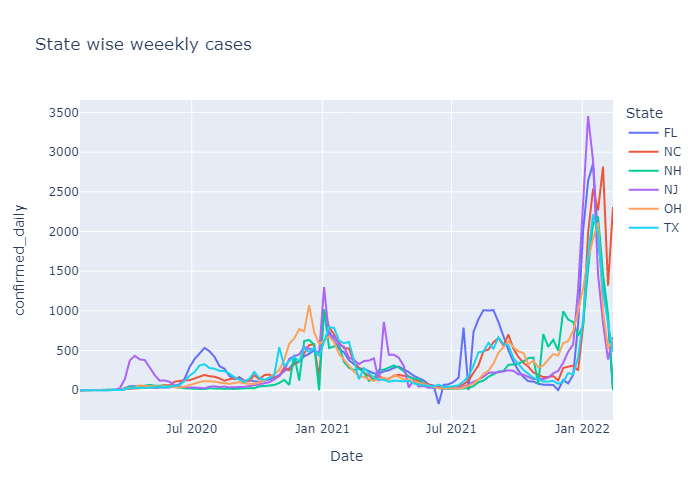

In [101]:
fig = px.line(combine_states_weekly, x="Date", y="confirmed_daily", color="State",
              line_group="State", hover_name="State", title ='State wise weeekly cases')
#display plot
fig.write_image("Graphs1/Weekly case state wise_line.png")
Image(filename="Graphs1/Weekly case state wise_line.png")
#fig.show()

### Describe why the rates differ across these states in the notebook.

#### Basic inference from the data.
#### 1.
#### 2.
#### 3.
#### 4.
#### 5.

## Performing statistics on combined state data

In [24]:
combine_states_stats=combine_states_weekly.groupby('State')['confirmed_daily'].agg(['mean','median']).reset_index()
combine_states_stats

,State,mean,median
0,FL,345.518519,186.0
1,NC,332.666667,174.0
2,NH,265.861111,77.0
3,NJ,322.287037,164.5
4,OH,300.768519,133.0
5,TX,291.870370,155.5


### Let's plot bar graph of the mean and the median and check what can be inferrred from it. 
#### I am using graph_objects of plotly to generate the plots

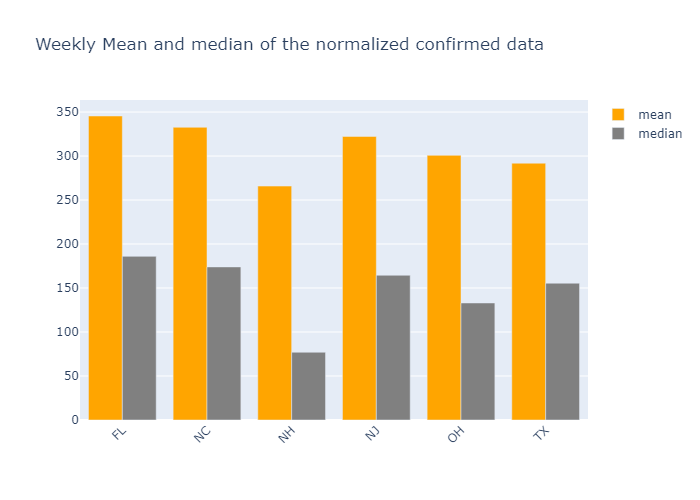

In [433]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x=combine_states_stats['State'],
    y=combine_states_stats['mean'],
    name='mean',
    marker_color='Orange'
))
fig.add_trace(go.Bar(
    x=combine_states_stats['State'],
    y=combine_states_stats['median'],
    name='median',
    marker_color='grey'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45,
    title="Weekly Mean and median of the normalized confirmed data")

fig.write_image("Graphs1/combined_mean_medianCases.png")
Image(filename="Graphs1/combined_mean_medianCases.png")
#fig.show()

In [25]:
#deaths data
combine_states_d_stats=combine_states_weekly.groupby('State')['deaths_daily'].agg(['mean','median']).reset_index()
combine_states_d_stats

,State,mean,median
0,FL,2.268519,2.0
1,NC,2.796296,2.0
2,NH,2.212963,1.0
3,NJ,4.870370,2.0
4,OH,3.888889,2.0
5,TX,3.620370,3.0


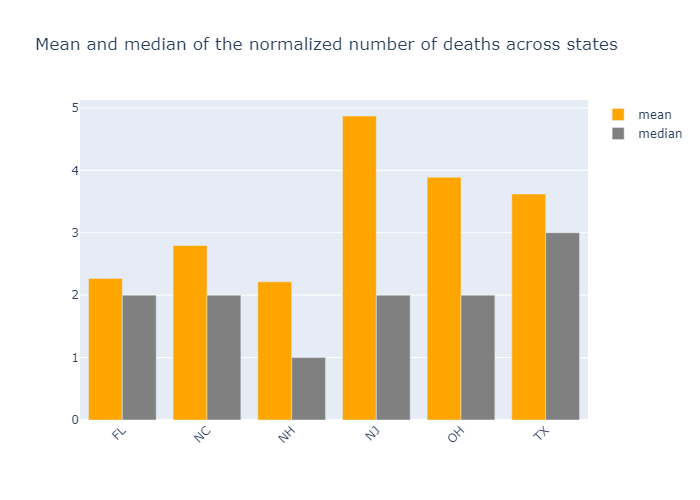

In [26]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=combine_states_d_stats['State'],
    y=combine_states_d_stats['mean'],
    name='mean',
    marker_color='orange'
))
fig.add_trace(go.Bar(
    x=combine_states_d_stats['State'],
    y=combine_states_d_stats['median'],
    name='median',
    marker_color='grey'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45,
    title="Mean and median of the normalized number of deaths across states")

fig.write_image("Graphs1/combined_mean_medianDeaths.png")
Image(filename="Graphs1/combined_mean_medianDeaths.png")
#fig.show()

Here I am using Kaleido to have static graphs instead of interactive plotly graphs

## Task 3: 

### Filtering county data from NC state

In [31]:
# selecting NC from the Dataset
nc_counties = data[data.State == 'NC']

#using diff() to find daily new number of cases and deaths
nc_counties['confirmed_daily'] = nc_counties['Confirmed'].diff()
nc_counties['deaths_daily'] = nc_counties['Deaths'].diff()

#selecting data from row 1(removing NaN value)
nc_counties = nc_counties.iloc[1: , :]

#groupby date and caculating total new number of cases and deaths each day
nc_daily = nc_counties.groupby(["Date"]).sum().reset_index()

### Normalizing the data on a population of 1000 people as county has less population than states (population density)

In [32]:
#perform normalization on a population of 1000 people
nc_counties['confirmed_daily_normalized'] = (nc_counties['Confirmed']/nc_counties['population'])*1000
nc_counties['deaths_daily_normalized'] = (nc_counties['Deaths']/nc_counties['population'])*1000

#Normalizing the daily cases data
nc_daily['confirmed_daily_normalized'] = abs((nc_daily['confirmed_daily']/nc_daily['population'])*1000)
nc_daily['deaths_daily_normalized'] = abs((nc_daily['deaths_daily']/nc_daily['population'])*1000)

#filtering the columns requeired
nc_counties = nc_counties[['County_Name', 'Date', 'confirmed_daily', 'deaths_daily','confirmed_daily_normalized','deaths_daily_normalized']]
nc_daily = nc_daily[['Date', 'confirmed_daily', 'deaths_daily','confirmed_daily_normalized','deaths_daily_normalized']]

#electing data from row 1(removing NaN value)
nc_daily = nc_daily.iloc[1: , :]
#print counties data
nc_counties

,County_Name,Date,confirmed_daily,deaths_daily,confirmed_daily_normalized,deaths_daily_normalized
1426437,alamance county,2020-01-23,0.0,0.0,0.000000,0.000000
1426438,alamance county,2020-01-24,0.0,0.0,0.000000,0.000000
1426439,alamance county,2020-01-25,0.0,0.0,0.000000,0.000000
1426440,alamance county,2020-01-26,0.0,0.0,0.000000,0.000000
1426441,alamance county,2020-01-27,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...
1501231,yancey county,2022-02-03,18.0,1.0,244.894571,2.545797
1501232,yancey county,2022-02-04,14.0,2.0,245.669378,2.656483
1501233,yancey county,2022-02-05,0.0,0.0,245.669378,2.656483
1501234,yancey county,2022-02-06,0.0,0.0,245.669378,2.656483


### Log normalizing the county data

In [34]:
nc_counties['Log normalized confirmed'] = np.log(nc_counties['confirmed_daily_normalized'])
nc_counties['Log normalized deaths'] = np.log(nc_counties['deaths_daily_normalized'])
nc_counties

,County_Name,Date,confirmed_daily,deaths_daily,confirmed_daily_normalized,deaths_daily_normalized,Log normalized confirmed,Log normalized deaths
1426437,alamance county,2020-01-23,0.0,0.0,0.000000,0.000000,-inf,-inf
1426438,alamance county,2020-01-24,0.0,0.0,0.000000,0.000000,-inf,-inf
1426439,alamance county,2020-01-25,0.0,0.0,0.000000,0.000000,-inf,-inf
1426440,alamance county,2020-01-26,0.0,0.0,0.000000,0.000000,-inf,-inf
1426441,alamance county,2020-01-27,0.0,0.0,0.000000,0.000000,-inf,-inf
...,...,...,...,...,...,...,...,...
1501231,yancey county,2022-02-03,18.0,1.0,244.894571,2.545797,5.500828,0.934444
1501232,yancey county,2022-02-04,14.0,2.0,245.669378,2.656483,5.503987,0.977003
1501233,yancey county,2022-02-05,0.0,0.0,245.669378,2.656483,5.503987,0.977003
1501234,yancey county,2022-02-06,0.0,0.0,245.669378,2.656483,5.503987,0.977003


### Replacing negative infinite values in log normalized column by zero using replace fucntion.

In [36]:
#Replacing -inf value in Log normalized confirmed and Log normalizeed deaths with 0.
nc_counties['Log normalized confirmed'] = nc_counties['Log normalized confirmed'].replace(-np.inf,0)
nc_counties['Log normalized deaths'] = nc_counties['Log normalized deaths'].replace(-np.inf,0)
nc_counties

,County_Name,Date,confirmed_daily,deaths_daily,confirmed_daily_normalized,deaths_daily_normalized,Log normalized confirmed,Log normalized deaths
1426437,alamance county,2020-01-23,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1426438,alamance county,2020-01-24,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1426439,alamance county,2020-01-25,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1426440,alamance county,2020-01-26,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1426441,alamance county,2020-01-27,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1501231,yancey county,2022-02-03,18.0,1.0,244.894571,2.545797,5.500828,0.934444
1501232,yancey county,2022-02-04,14.0,2.0,245.669378,2.656483,5.503987,0.977003
1501233,yancey county,2022-02-05,0.0,0.0,245.669378,2.656483,5.503987,0.977003
1501234,yancey county,2022-02-06,0.0,0.0,245.669378,2.656483,5.503987,0.977003


## Task 3: 
### Identify five counties within a state of your choice with high cases and death rates.

In [42]:
#Calculating mean of the new cases and deaths, sorting in descending order after grouping by county.
nc_counties.groupby(['County_Name'])['confirmed_daily','deaths_daily'].agg({'confirmed_daily':'mean','deaths_daily' :'mean'}).reset_index().round(decimals=0).sort_values(["confirmed_daily", "deaths_daily"], ascending = (False, False))

,County_Name,confirmed_daily,deaths_daily
91,wake county,352.0,1.0
59,mecklenburg county,349.0,2.0
40,guilford county,140.0,1.0
33,forsyth county,101.0,1.0
89,union county,78.0,1.0
...,...,...,...
34,franklin county,-93.0,-1.0
26,currituck county,-99.0,-1.0
41,halifax county,-130.0,-1.0
60,mitchell county,-353.0,-2.0


#### In above, the data is grouped by county_names and calculate the mean of confirmed_daily and deaths_daily data and sorting it to get the counties with highest number of cases and deaths

### Selecting top 5 counties from the above output.

In [44]:
#Selecting counties
county_list = ['wake county', 'mecklenburg county', 'guilford county', 'forsyth county', 'union county']

#filtering data countywise
nc_counties = nc_counties[nc_counties.County_Name.isin(county_list)]

nc_counties

,County_Name,Date,confirmed_daily,deaths_daily,confirmed_daily_normalized,deaths_daily_normalized,Log normalized confirmed,Log normalized deaths
1451120,forsyth county,2020-01-22,-13035.0,-136.0,0.000000,0.000000,0.000000,0.000000
1451121,forsyth county,2020-01-23,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1451122,forsyth county,2020-01-24,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1451123,forsyth county,2020-01-25,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1451124,forsyth county,2020-01-26,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1495247,wake county,2022-02-03,1429.0,0.0,243.009963,0.869791,5.493102,-0.139502
1495248,wake county,2022-02-04,1546.0,2.0,244.400550,0.871590,5.498808,-0.137436
1495249,wake county,2022-02-05,0.0,0.0,244.400550,0.871590,5.498808,-0.137436
1495250,wake county,2022-02-06,0.0,0.0,244.400550,0.871590,5.498808,-0.137436


### Dropping rows with NaN values

In [45]:
nc_counties = nc_counties.drop([1451120])
nc_counties = nc_counties.drop([1470568])
nc_counties = nc_counties.drop([1493008])
nc_counties = nc_counties.drop([1494504])
nc_counties = nc_counties.drop([1456356])

In [46]:
nc_counties = nc_counties.drop([1456869])
nc_counties = nc_counties.drop([1456890])

In [47]:
# Daily Deaths were negative here
nc_counties = nc_counties.drop([1451396])
nc_counties = nc_counties.drop([1451602])
nc_counties = nc_counties.drop([1456632])
nc_counties = nc_counties.drop([1456834])
nc_counties = nc_counties.drop([1456879])
nc_counties = nc_counties.drop([1456882])
nc_counties = nc_counties.drop([1456973])
nc_counties = nc_counties.drop([1470844])
nc_counties = nc_counties.drop([1471079])
nc_counties = nc_counties.drop([1471094])
nc_counties = nc_counties.drop([1471130])
nc_counties = nc_counties.drop([1471190])
nc_counties = nc_counties.drop([1471212])
nc_counties = nc_counties.drop([1493464])
nc_counties = nc_counties.drop([1493534])
nc_counties = nc_counties.drop([1494780])
nc_counties = nc_counties.drop([1494798])
nc_counties = nc_counties.drop([1494848])
nc_counties = nc_counties.drop([1494905])
nc_counties = nc_counties.drop([1494975])
nc_counties = nc_counties.drop([1494978])
nc_counties = nc_counties.drop([1494987])
nc_counties = nc_counties.drop([1495015])

In [64]:
nc_counties

,County_Name,Date,confirmed_daily,deaths_daily,confirmed_daily_normalized,deaths_daily_normalized,Log normalized confirmed,Log normalized deaths
1451121,forsyth county,2020-01-23,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1451122,forsyth county,2020-01-24,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1451123,forsyth county,2020-01-25,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1451124,forsyth county,2020-01-26,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1451125,forsyth county,2020-01-27,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1495247,wake county,2022-02-03,1429.0,0.0,243.009963,0.869791,5.493102,-0.139502
1495248,wake county,2022-02-04,1546.0,2.0,244.400550,0.871590,5.498808,-0.137436
1495249,wake county,2022-02-05,0.0,0.0,244.400550,0.871590,5.498808,-0.137436
1495250,wake county,2022-02-06,0.0,0.0,244.400550,0.871590,5.498808,-0.137436


## Converting data to weekly

In [65]:
nc_counties16 = nc_counties

In [66]:
nc_counties16= nc_counties16.groupby(['County_Name',pd.Grouper(key='Date', freq='w')])['confirmed_daily','deaths_daily','confirmed_daily_normalized','deaths_daily_normalized','Log normalized confirmed','Log normalized deaths'].agg({'confirmed_daily':'mean','deaths_daily' :'mean','confirmed_daily_normalized':'mean','deaths_daily_normalized':'mean','Log normalized confirmed':'mean','Log normalized deaths':'mean'}).reset_index().round(decimals=0)
nc_counties16

,County_Name,Date,confirmed_daily,deaths_daily,confirmed_daily_normalized,deaths_daily_normalized,Log normalized confirmed,Log normalized deaths
0,forsyth county,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0
1,forsyth county,2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0
2,forsyth county,2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0
3,forsyth county,2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0
4,forsyth county,2020-02-23,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
535,wake county,2022-01-16,4618.0,3.0,184.0,1.0,5.0,-0.0
536,wake county,2022-01-23,3375.0,0.0,207.0,1.0,5.0,-0.0
537,wake county,2022-01-30,3692.0,4.0,231.0,1.0,5.0,-0.0
538,wake county,2022-02-06,1597.0,0.0,243.0,1.0,5.0,-0.0


### Plotting raw and log normalized values of county data


### Plot of daily confirmed cases county wise.

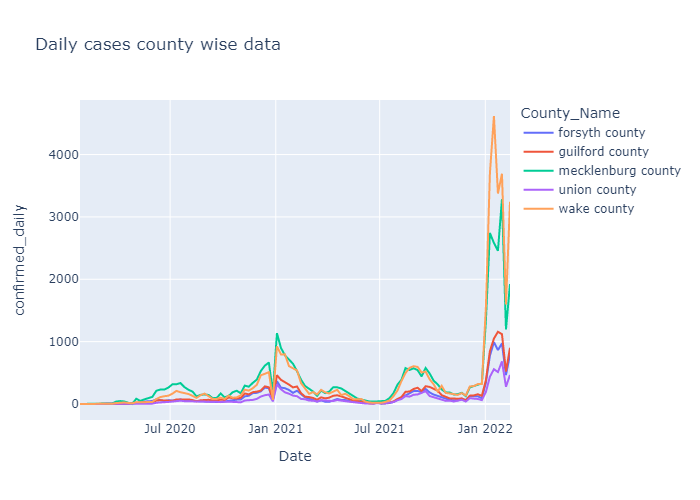

In [69]:
fig = px.line(nc_counties16, x="Date", y="confirmed_daily", color="County_Name",
              line_group="County_Name", hover_name="County_Name", title ='Daily cases county wise data')
#display plot
#fig.show()
fig.write_image("Graphs1/Daily Cases county wise.png")
Image(filename="Graphs1/Daily cases county wise.png")

### Plot of daily deaths county wise.

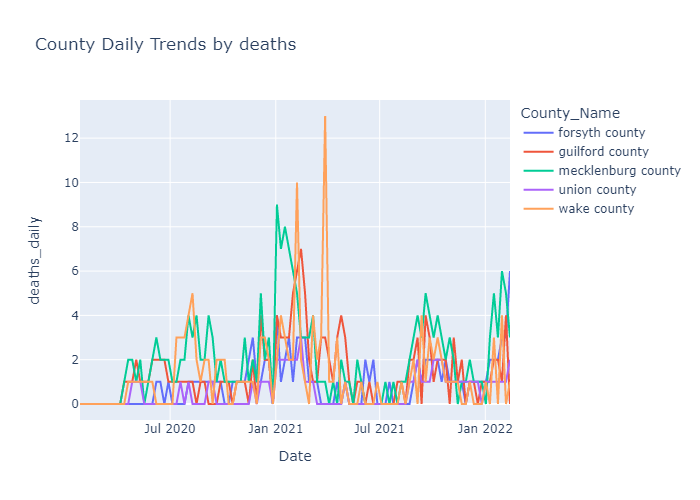

In [70]:
#make the plot of north carolina counties by deaths
fig = px.line(nc_counties16, x="Date", y="deaths_daily", color="County_Name",
              line_group="County_Name", hover_name="County_Name", title ='County Daily Trends by deaths')
#display plot
#fig.show()
fig.write_image("Graphs1/County Daily Trends by deaths.png")
Image(filename="Graphs1/County Daily Trends by deaths.png")

## Log Normalized Plots

In [82]:
nc_county_normalized = nc_counties

### Filtering data: removing dates which are not in the correct format.

In [86]:
nc_county_normalized = nc_county_normalized[nc_county_normalized.Date!= 0]

### Changing the negative log values with zero in the column Log normalized confirmed

In [84]:
nc_county_normalized[nc_county_normalized['Log normalized confirmed']<0] = 0
nc_county_normalized['Log normalized confirmed']

1451121    0.000000
1451122    0.000000
1451123    0.000000
1451124    0.000000
1451125    0.000000
             ...   
1495247    5.493102
1495248    5.498808
1495249    5.498808
1495250    5.498808
1495251    5.510666
Name: Log normalized confirmed, Length: 3710, dtype: float64

### Log normalized plot for confirmed cases county wise

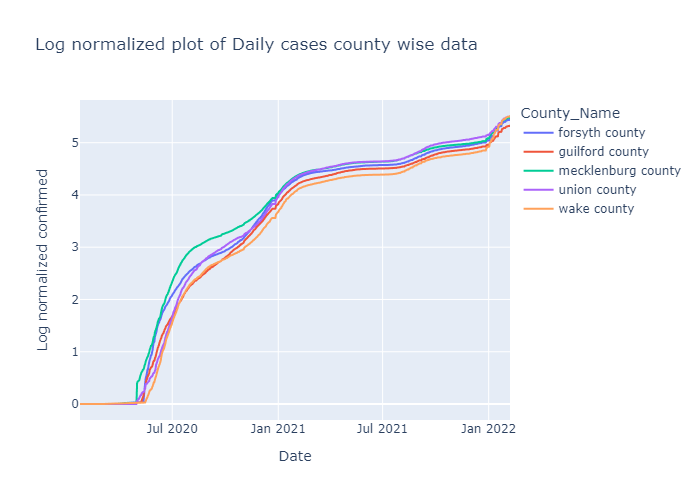

In [87]:
fig = px.line(nc_county_normalized, x="Date", y="Log normalized confirmed", color="County_Name",
              line_group="County_Name", hover_name="County_Name", title ='Log normalized plot of Daily cases county wise data')
#fig.show()
fig.write_image("Graphs1/Log normalized Daily Cases county wise.png")
Image(filename="Graphs1/Log normalized Daily cases county wise.png")

### Changing the negative log values with zero in the column Log normalized deaths

In [88]:
nc_county_normalized[nc_county_normalized['Log normalized deaths']<0] = 0
nc_county_normalized['Log normalized deaths']

1451121    0.0
1451122    0.0
1451123    0.0
1451124    0.0
1451125    0.0
          ... 
1495247    0.0
1495248    0.0
1495249    0.0
1495250    0.0
1495251    0.0
Name: Log normalized deaths, Length: 3445, dtype: float64

### Filtering data: removing dates which are not in the correct format.

In [89]:
nc_county_normalized = nc_county_normalized[nc_county_normalized.Date != 0]

### Log normalized plot for deaths cases county wise

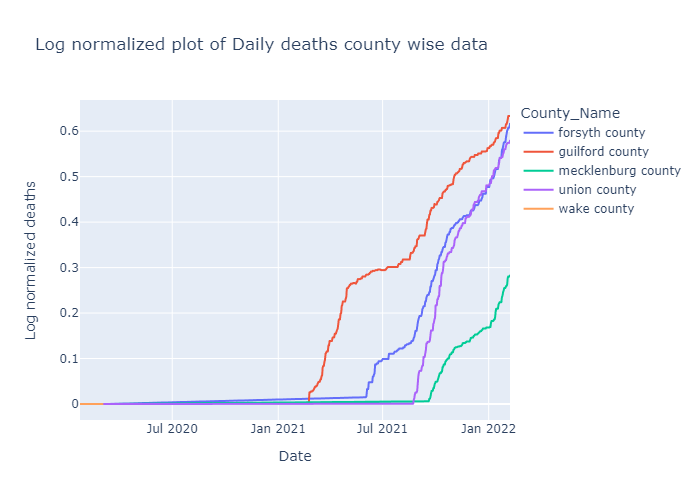

In [90]:
fig = px.line(nc_county_normalized, x="Date", y="Log normalized deaths", color="County_Name",
              line_group="County_Name", hover_name="County_Name", title ='Log normalized plot of Daily deaths county wise data')
#display plot
#fig.show()
fig.write_image("Graphs1/Log normalized Daily deaths county wise.png")
Image(filename="Graphs1/Log normalized Daily deaths county wise.png")

### Now as we have showed the weekly trend of 5 different state and also weekly trend county wise of North Carolina. 
#### Lets display daily cases and deaths in North Carolina

#### Here we will make use of nc_weekly data

#### Daily confirmed cases North Carolina

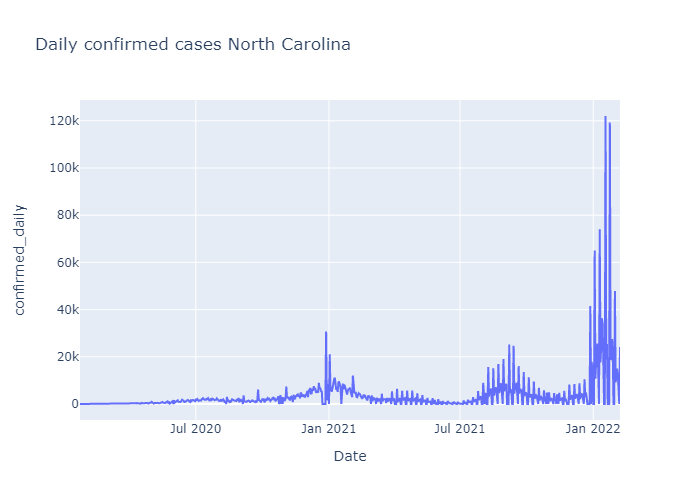

In [102]:
#make a plot of state  new daily cases
fig = px.line(nc_daily, x="Date", y="confirmed_daily", title ='Daily confirmed cases North Carolina')

#display plot
#fig.show()
fig.write_image("Graphs1/NC Daily confirmed cases.png")
Image(filename="Graphs1/NC Daily confirmed cases.png")

#### Daily deaths cases North Carolina

In [95]:
nc_daily1 = nc_daily

In [96]:
nc_daily1 = nc_daily[nc_daily.deaths_daily >= 0]

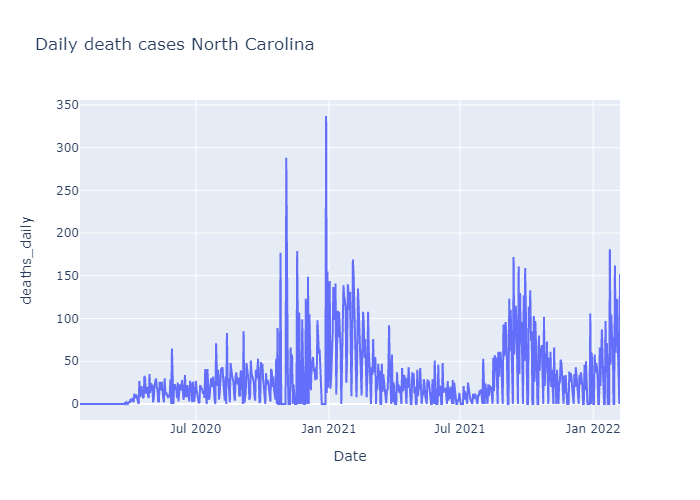

In [97]:
#make plot of north carolina daily trends
fig = px.line(nc_daily1, x="Date", y="deaths_daily", title ='Daily death cases North Carolina')

#display plot
#fig.show()
fig.write_image("Graphs1/Daily death cases North Carolina.png")
Image(filename="Graphs1/Daily death cases North Carolina.png")